## Density estimation using Gaussian Processes and Gaussian uncertainties with GPy

In [1]:
# Import libreraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import GPy

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

Import data using Pandas

In [2]:
data=pd.read_csv('/Users/andreassolders/Box Sync/AlFONS_shared/Measurments/Measurement_IGISOL_2019/Homogenity/homo_sel.csv')
data['hit']=np.ones(len(data.index))
data.head()

,x_pos_d,y_pos_d,angle,radius,hit
0,-0.8250,-0.5280,290.560415,1.534761,1.0
1,1.6170,0.0495,343.916350,3.102435,1.0
2,-4.8015,2.1120,160.711810,3.641925,1.0
3,-0.7425,5.6760,82.571932,4.807343,1.0
4,4.7025,1.6500,6.963966,6.111588,1.0


Plot the data using matplotlib.

(-25, 25)

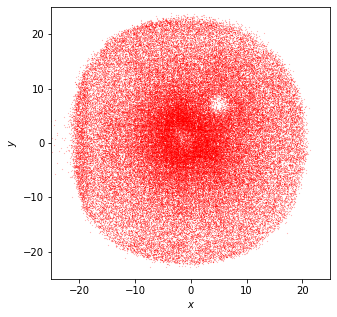

In [3]:
# Plot the data
plt.figure(figsize=[5,5])
plt.plot(data.x_pos_d, data.y_pos_d, 'r.', markersize=0.2, label='hits')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-25, 25)
plt.xlim(-25, 25)

Make a histogram of the data in x with bin position at the center of the bins.\
How does the bin size affect the final uncertainty?

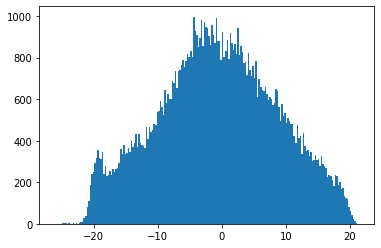

In [4]:
# Histogram data

z, bins = np.histogram(data.x_pos_d, bins=200)

width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, z, align='center', width=width)
plt.show()


Use Gaussian process to fit the histogram.\
Set the bin centers as X and the bin heights at Y\
Construct a kernel. Radial Basis Function (RBF) is the Gaussian kernel.\
$k(\sigma,r) = \sigma^2 e^{-\frac{1}{2}r^2}$\
The variance ($\sigma$) defines the maximum variation beteen neighbouring points.\
The lengthscale ($r$) defines how far appart points are correlated.

In [5]:
X = np.atleast_2d(center).T
Y = np.atleast_2d(z).T
#X = np.random.uniform(-3.,3.,(20,1))
#Y = np.sin(X) + np.random.randn(20,1)*0.05
#print(X)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1)
m = GPy.models.GPRegression(X,Y,kernel,noise_var=1)
print(m)


Name : GP regression
Objective : 2678447.520375453
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [6]:
X = np.atleast_2d(center).T
Y = np.atleast_2d(z).T
#X = np.random.uniform(-3.,3.,(20,1))
#Y = np.sin(X) + np.random.randn(20,1)*0.05
#print(X)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1)
m = GPy.models.GPRegression(X,Y,kernel,noise_var=1)
print(m)


Name : GP regression
Objective : 2678447.520375453
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


Plot the result

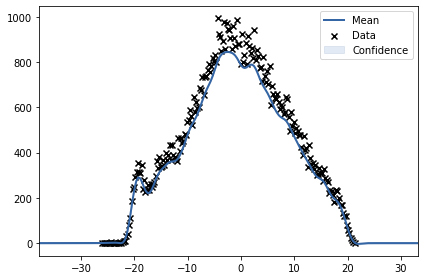

In [7]:
#GPy.plotting.change_plotting_library('plotly')
fig = m.plot()
#GPy.plotting.show(fig)

Evaluate the model and plot the prediction with uncertainties.\
However, uncertainties are very small (~1).

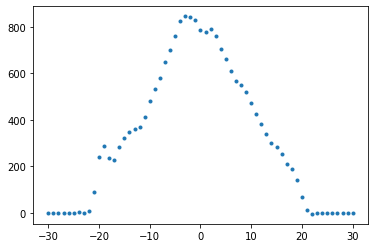

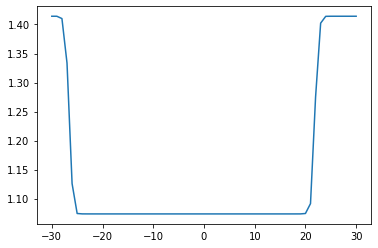

In [8]:
x = np.linspace(-30,30,61)[:,None]
#print(x)
Y_p, Var_p  = m.predict(x)
#print(Var_p[:,0])
plt.figure(1)
plt.errorbar(x,Y_p,yerr=np.sqrt(Var_p)[:,0],ls='None', marker='.')
plt.figure(2)
plt.plot(x, np.sqrt(Var_p)[:,0])

Optimze the model parameters. By deafult, GPy uses the lbfgsb optimizer. The prefered optimizer is the scaled conjugate gradient (scg) method.\
The optimize_restarts function selects random initializations (drawn from N(0,1)) for the parameter values, optimizes each, and sets the model to the best solution found.

In [9]:
m.optimize_restarts(num_restarts = 10)
#m.optimize_restarts(optimizer='scg', num_restarts = 10)
print(m)

Optimization restart 1/10, f = 1066.289125395304
Optimization restart 2/10, f = 1066.28912539968
Optimization restart 3/10, f = 1057.2305956757862
Optimization restart 4/10, f = 1057.2305968269973
Optimization restart 5/10, f = 1066.2891253343428
Optimization restart 6/10, f = 1066.2891253346052
Optimization restart 7/10, f = 1066.2891253410344
Optimization restart 8/10, f = 1057.2305956993837
Optimization restart 9/10, f = 1066.2891253344674
Optimization restart 10/10, f = 1057.2305956906143

Name : GP regression
Objective : 1057.2305956757862
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  141645.70238500566  |      +ve      |        
  rbf.lengthscale          |  2.8669065744579485  |      +ve      |        
  Gaussian_noise.variance  |  1225.4829761267267  |      +ve      |        


The Gaussin_noice.variance is the variance of the original datapoints assuming Gaussian uncertainties.

Plot the result with uncertainties

(-100, 1000)

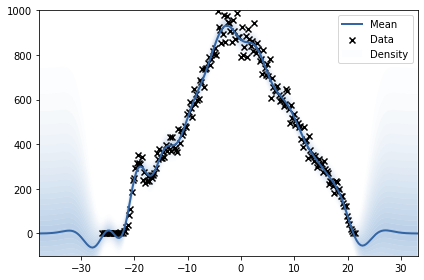

In [10]:
fig = m.plot(plot_density=True)
plt.ylim(bottom=-100, top = 1000)
#GPy.plotting.show(fig)


Evaluate and plot.\
Errorbar are now more realistic (~37)

29.463869198775384
0.03393987372308737
36.81478738530323
0.042407506854240114


 /Users/andreassolders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:invalid value encountered in sqrt
 /Users/andreassolders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:invalid value encountered in sqrt


<ErrorbarContainer object of 3 artists>

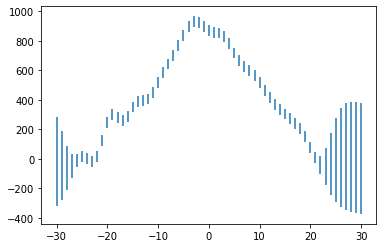

In [11]:
x = np.linspace(-30,30,61)[:,None]
#print(x)
Y_p, Var_p  = m.predict(x)
print(np.sqrt(Y_p)[30,0])
print(1/np.sqrt(Y_p)[30,0])
print(np.sqrt(Var_p[30,0]))
print(np.sqrt(Var_p[30,0])/Y_p[30,0])
plt.errorbar(x,Y_p,yerr=np.sqrt(Var_p)[:,0],ls='None')

Create 2D histogram and find the center of the bins.

In [12]:
# 2D Histogram data in (x,y)
plt.figure(figsize=[6,5])

histdata, xbins, ybins = np.histogram2d(data.x_pos_d, data.y_pos_d, bins=60)

xwidth = 1 * (xbins[1] - xbins[0])
ywidth = 1 * (ybins[1] - ybins[0])
xcenter = (xbins[:-1] + xbins[1:]) / 2
ycenter = (ybins[:-1] + ybins[1:]) / 2

#plt.contourf(xcenter, ycenter, histdata)
#plt.colorbar()
#plt.show()

#print(histdata)

<Figure size 432x360 with 0 Axes>

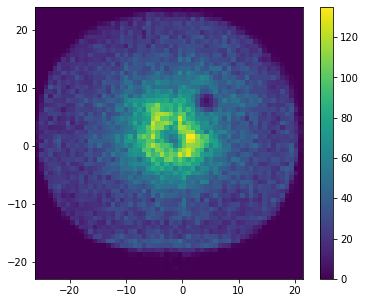

In [13]:
plt.figure(figsize=[6,5])
plt.pcolormesh(xbins,ybins,histdata)
plt.colorbar()
plt.show()

Prepare the arrays.\
Create the kernal.\
Create a gaussian process.\
Optimize and print\

In [14]:
#XY = np.array([xcenter,ycenter]).T

XX, YY = np.meshgrid(xcenter, ycenter)
XF=XX.flatten()
YF=YY.flatten('C')
XY = np.array([XF,YF]).T

Z=np.atleast_2d(histdata.flatten()).T

# define kernel
kernel2 = GPy.kern.RBF(input_dim=2, variance=100, lengthscale=1)

# create simple GP model
m2 = GPy.models.GPRegression(XY,Z,kernel2)

# optimize and display (By deafult, GPy uses the lbfgsb optimizer.)
m2.optimize_restarts(num_restarts = 10)
display(m2)

Optimization restart 1/10, f = 11837.520736184199
Optimization restart 2/10, f = 11837.520734799296
Optimization restart 3/10, f = 11837.520734741056
Optimization restart 4/10, f = 11837.520734724436
Optimization restart 5/10, f = 11837.520734694732
Optimization restart 6/10, f = 11837.5207347682
Optimization restart 7/10, f = 11837.520734722137
Optimization restart 8/10, f = 11837.520738091263
Optimization restart 9/10, f = 11837.520735174485
Optimization restart 10/10, f = 11837.520734864238


GP_regression.,value,constraints,priors
rbf.variance,429.25983043809015,+ve,
rbf.lengthscale,2.597265409437757,+ve,
Gaussian_noise.variance,28.034048797367543,+ve,


 /Users/andreassolders/opt/anaconda3/lib/python3.7/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2b0db110>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x1a2b0db4d0>]}

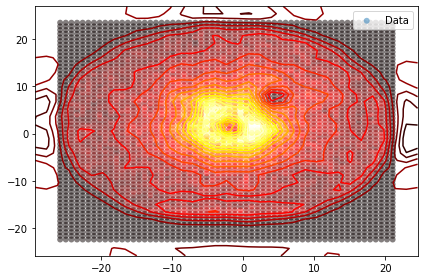

In [15]:
#print(m2)
#GPy.plotting.change_plotting_library('matplotlib')
m2.plot()
#fig = m2.plot()
#display(GPy.plotting.show(fig))
#display(GPy.plotting.show(fig))
#plt.show()
#GPy.plotting.show(fig)

Evaluate the model at possitions x_p and y_p.\
(This was my solution, a better and faster way I found online follows.)

In [16]:
x_p = np.linspace(-25.7395875,21.0370875,240)#[:,None]
y_p = np.linspace(-22.4467375,23.4862375,240)#[:,None]
#xy_p =np.array([x_p,y_p]).T

Z_p = np.zeros(shape=(len(x_p),len(y_p)))
VarZ_p = np.zeros(shape=(len(x_p),len(y_p)))

for i in range(len(x_p)):
    for j in range(len(y_p)):
        Z_p[i,j], VarZ_p[i,j]  = m2.predict(np.atleast_2d([x_p[i],y_p[j]]))#[x_p[i],y_p[j]]))
        #Z_out = np.append(Z_out,Z_p)
        
#Z_p, VarZ_p  = m2.predict(XY)
#Z_p, VarZ_p  = m2.predict(np.atleast_2d([0,1]))

Plot the result as contour plot

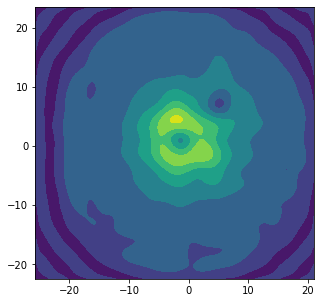

In [17]:
plt.figure(figsize=[5,5])

#Axes3D.scatter(XY[:,0], XY[:,1], Z_p[:,0])
#plt.scatter(XY[:,0],Z_p)
plt.contourf(x_p, y_p, Z_p)
#plt.contourf(XY[:,0], XY[:,1], Z_p)

Plot the result as mesh plot.

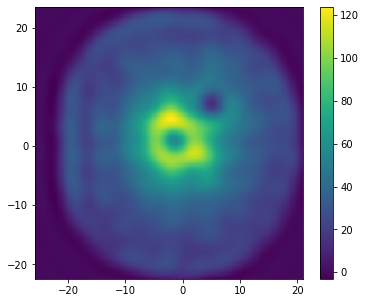

In [18]:
plt.figure(figsize=[6,5])

plt.pcolormesh(x_p, y_p, Z_p)
plt.colorbar()

This is a better and faster way of evaluating the solution. The resolution can be set by res.

In [19]:
res = 240
xi, yi = np.mgrid[min(xbins):max(xbins):res*1j, min(ybins):max(ybins):res*1j]
Z_p, VarZ_p  = m2.predict(np.vstack([xi.flatten(), yi.flatten()]).T)
zi = Z_p.reshape(xi.shape)

However, ploting the result we note that the x and y axis have changed place. Compare with plot of data.

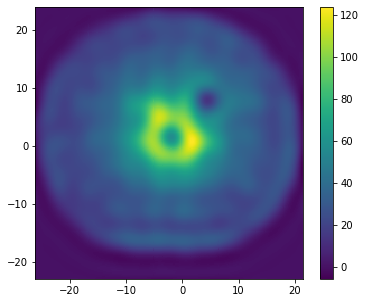

In [20]:
plt.figure(figsize=[6,5])

plt.pcolormesh(xi, yi, zi)
plt.colorbar()

If we interchange x and y the result looks good.

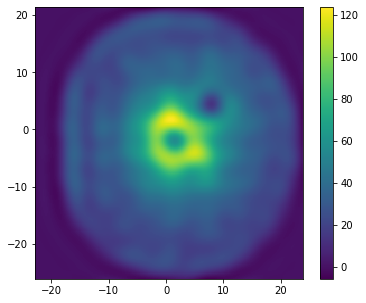

In [21]:
plt.figure(figsize=[6,5])

plt.pcolormesh(yi, xi, zi)
plt.colorbar()